<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math as m
sb.set_style('whitegrid')
sb.despine(offset=10, trim=True);

<Figure size 432x288 with 0 Axes>

In [2]:
x = []
for i in range(-5,6):
  x.append(i)

mean = 0
std = 1

## Gaussian Probability Density Function (PDF)
$$pdf(x, \mu, \sigma) = \frac{1}{\sqrt{2 \times \pi} \times \sigma} \times e^{-(\frac{(x-\mu)^2}{2 \times \sigma^2})}$$

In [3]:
pdf_x = []

for i in x:
  a = (1 / (np.sqrt(2*m.pi)*std)) * np.exp(-1 * (np.square(i-mean) / (2*np.square(std))))
  pdf_x.append(a)

pdf_x

[1.4867195147342977e-06,
 0.00013383022576488537,
 0.0044318484119380075,
 0.05399096651318806,
 0.24197072451914337,
 0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 0.0044318484119380075,
 0.00013383022576488537,
 1.4867195147342977e-06]

<Axes: ylabel='Density'>

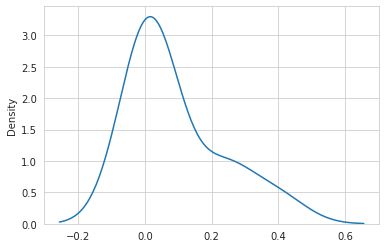

In [4]:
sb.kdeplot(pdf_x)

<Axes: ylabel='Density'>

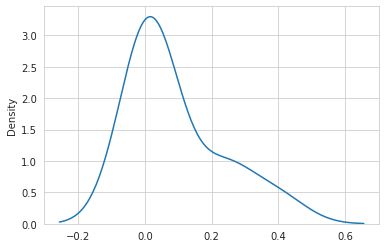

In [5]:
from scipy.stats import norm
sb.kdeplot(norm.pdf(x, mean, std))

## Load Sample Data<a id='sampledata'></a>

In [6]:
x1 = [3.393533211, 3.110073483, 1.343808831, 3.582294042, 2.280362439, 
      7.423436942, 5.745051997, 9.172168622, 7.792783481, 7.939820817]
x2 = [2.331273381, 1.781539638, 3.368360954, 4.67917911, 2.866990263, 
      4.696522875, 3.533989803, 2.511101045, 3.424088941, 0.791637231]

y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


<Axes: xlabel='x1', ylabel='x2'>

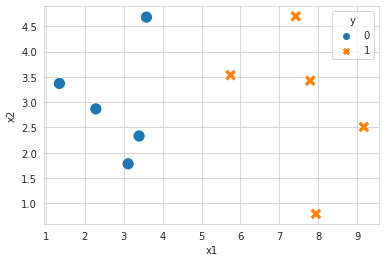

In [7]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)

In [8]:
# Calculate Class Probabilities
y_0 = len(df[df['y'] == 0]) / len(df['y'])
y_1 = len(df[df['y'] == 1]) / len(df['y'])

In [9]:
# Calculate Conditional Probabilities
x1_y0_mean = df['x1'][df['y'] == 0].mean()
x1_y1_mean = df['x1'][df['y'] == 1].mean()
x2_y0_mean = df['x2'][df['y'] == 0].mean()
x2_y1_mean = df['x2'][df['y'] == 1].mean()

x1_y0_std = df['x1'][df['y'] == 0].std()
x1_y1_std = df['x1'][df['y'] == 1].std()
x2_y0_std = df['x2'][df['y'] == 0].std()
x2_y1_std = df['x2'][df['y'] == 1].std()

In [14]:
df_pred = df.copy()
df_pred['pdf_x1_y0'] = norm.pdf(df_pred['x1'], x1_y0_mean, x1_y0_std)
df_pred['pdf_x2_y0'] = norm.pdf(df_pred['x2'], x2_y0_mean, x2_y0_std)
df_pred['pdf_x1_y1'] = norm.pdf(df_pred['x1'], x1_y1_mean, x1_y1_std)
df_pred['pdf_x2_y1'] = norm.pdf(df_pred['x2'], x2_y1_mean, x2_y1_std)
df_pred['out_y0'] = df_pred['pdf_x1_y0'] * df_pred['pdf_x2_y0'] * y_0
df_pred['out_y1'] = df_pred['pdf_x1_y1'] * df_pred['pdf_x2_y1'] * y_1
df_pred

,x1,x2,y,pdf_x1_y0,pdf_x2_y0,pdf_x1_y1,pdf_x2_y1,out_y0,out_y1
0,3.393533,2.331273,0,3.362559e-01,0.299321,9.340506e-04,0.247475,5.032428e-02,1.155772e-04
1,3.110073,1.781540,0,3.978954e-01,0.195591,4.148672e-04,0.194072,3.891230e-02,4.025712e-05
2,1.343809,3.368361,0,1.378989e-01,0.341438,8.049754e-07,0.265278,2.354196e-02,1.067712e-07
3,3.582294,4.679179,0,2.853953e-01,0.114959,1.557322e-03,0.139895,1.640435e-02,1.089305e-04
4,2.280362,2.866990,0,3.803012e-01,0.357468,2.848450e-05,0.273336,6.797275e-02,3.892921e-06
5,7.423437,4.696523,1,1.232827e-06,0.112256,3.193247e-01,0.137962,6.919582e-08,2.202730e-02
6,5.745052,3.533990,1,2.254527e-03,0.321488,1.026459e-01,0.255897,3.624019e-04,1.313337e-02
7,9.172169,2.511101,1,1.500334e-11,0.326101,1.457989e-01,0.259772,2.446300e-12,1.893726e-02
8,7.792783,3.424089,1,1.519618e-07,0.335428,3.198314e-01,0.262464,2.548609e-08,4.197207e-02
9,7.939821,0.791637,1,6.318137e-08,0.048831,3.121587e-01,0.087371,1.542597e-09,1.363675e-02


In [15]:
df_pred['Prediction'] = ''
df_pred.loc[df_pred['out_y0'] > df_pred['out_y1'], 'Prediction'] = 0
df_pred.loc[df_pred['out_y0'] <= df_pred['out_y1'], 'Prediction'] = 1
df_pred

,x1,x2,y,pdf_x1_y0,pdf_x2_y0,pdf_x1_y1,pdf_x2_y1,out_y0,out_y1,Prediction
0,3.393533,2.331273,0,3.362559e-01,0.299321,9.340506e-04,0.247475,5.032428e-02,1.155772e-04,0
1,3.110073,1.781540,0,3.978954e-01,0.195591,4.148672e-04,0.194072,3.891230e-02,4.025712e-05,0
2,1.343809,3.368361,0,1.378989e-01,0.341438,8.049754e-07,0.265278,2.354196e-02,1.067712e-07,0
3,3.582294,4.679179,0,2.853953e-01,0.114959,1.557322e-03,0.139895,1.640435e-02,1.089305e-04,0
4,2.280362,2.866990,0,3.803012e-01,0.357468,2.848450e-05,0.273336,6.797275e-02,3.892921e-06,0
5,7.423437,4.696523,1,1.232827e-06,0.112256,3.193247e-01,0.137962,6.919582e-08,2.202730e-02,1
6,5.745052,3.533990,1,2.254527e-03,0.321488,1.026459e-01,0.255897,3.624019e-04,1.313337e-02,1
7,9.172169,2.511101,1,1.500334e-11,0.326101,1.457989e-01,0.259772,2.446300e-12,1.893726e-02,1
8,7.792783,3.424089,1,1.519618e-07,0.335428,3.198314e-01,0.262464,2.548609e-08,4.197207e-02,1
9,7.939821,0.791637,1,6.318137e-08,0.048831,3.121587e-01,0.087371,1.542597e-09,1.363675e-02,1


In [16]:
from sklearn.metrics import accuracy_score

In [43]:
acc = accuracy_score(df_pred['y'].values, df_pred['Prediction'].astype(int).values)*100
print('Accuracy: {:.0f}%'.format(acc))

Accuracy: 100%


## Using Sklearn Library

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model = GaussianNB()
x = df.drop('y', axis=1)
y = df['y']
model.fit(x, y)
y_hat = model.predict(x)

acc = accuracy_score(y, y_hat)*100
print('Accuracy: {:.0f}%'.format(acc))

Accuracy: 100%
